# Wine Quality Dataset - Decision Tree Classifier
# -----------------------------------------------
## The Wine Quality dataset contains physicochemical properties of different red wines, along with a target variable
## representing the wine quality score (1-10). The goal is to predict the wine quality based on the given features.



# Features:
## 1. Fixed Acidity: Tartaric acid in g/dm³ (affects sourness).
## 2. Volatile Acidity: Acetic acid in g/dm³ (higher levels lead to unpleasant taste).
## 3. Citric Acid: Citric acid in g/dm³ (adds freshness and acts as a preservative).
## 4. Residual Sugar: Sugar left after fermentation in g/dm³ (affects sweetness).
## 5. Chlorides: Salt content in g/dm³ (affects wine taste and preservation).
## 6. Free Sulfur Dioxide: Unbound SO₂ in mg/dm³ (prevents spoilage).
## 7. Total Sulfur Dioxide: Total SO₂ in mg/dm³ (affects taste and shelf life).
## 8. Density: Density of wine in g/cm³ (related to alcohol and sugar).
## 9. pH: Acidity/alkalinity of wine (lower values indicate higher acidity).
## 10. Sulphates: Potassium sulphate in g/dm³ (acts as a preservative and antioxidant).
## 11. Alcohol: Alcohol content in % by volume.

# Target:
## - Quality: The wine quality score (1-10), with most wines rated between 3 and 8.

##Step 1: Import Libraries and Load the Dataset


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt




In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')


In [3]:
# Display the first few rows of the dataset
display(wine_data.head())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Separate features and target
X = wine_data.drop('quality', axis=1)  # Features
y = wine_data['quality']  # Target: Wine quality score (1-10)

In [5]:
wine_data.shape

(1599, 12)

##Step 2: Split the Dataset into Training and Test Sets
 - We will use 80% of the data for training and 20% for testing.

In [6]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of training and test sets
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")


Training set size: (1279, 11), Test set size: (320, 11)


##Step 3: Build the Initial Decision Tree Model (Without Hyperparameters)
 - We will first build a default decision tree and evaluate its performance.

In [7]:
# Build the initial Decision Tree classifier (without any hyperparameters)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)  # Fit the model

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

# Evaluate the accuracy of the model
train_Acc = accuracy_score(y_train, y_pred_train)

initial_accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Decision Tree Test Accuracy: {initial_accuracy:.2f}")
print(f"Initial Decision Tree Train Accuracy: {train_Acc:.2f}")


Initial Decision Tree Test Accuracy: 0.56
Initial Decision Tree Train Accuracy: 1.00


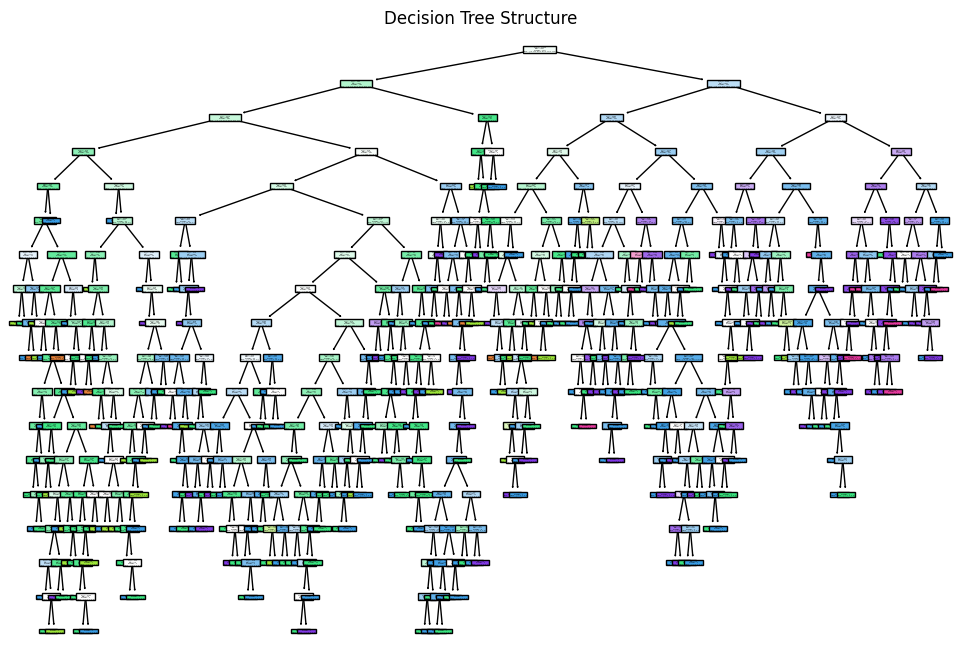

In [8]:
# Step 6: Plot the Decision Tree Structure
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True)
plt.title('Decision Tree Structure')
plt.show()

##Step 4: Add Hyperparameters (max_depth and min_samples_split)
- Let's experiment with the max_depth and min_samples_split hyperparameters to prevent overfitting and control the tree's complexity.

In [29]:
# Build a Decision Tree with max_depth and min_samples_split hyperparameters
clf_hyper = DecisionTreeClassifier(max_depth=2, min_samples_split=500, random_state=42)
clf_hyper.fit(X_train, y_train)

# Make predictions and evaluate the accuracy
y_pred_hyper = clf_hyper.predict(X_test)
accuracy_hyper = accuracy_score(y_test, y_pred_hyper)
print(f"Test Accuracy with max_depth=5 and min_samples_split=10: {accuracy_hyper:.2f}")

# Make predictions and evaluate the accuracy
y_pred_train = clf_hyper.predict(X_train)
Taccuracy_hyper = accuracy_score(y_train, y_pred_train)
print(f"Trian Accuracy with max_depth=5 and min_samples_split=10: {Taccuracy_hyper:.2f}")

Test Accuracy with max_depth=5 and min_samples_split=10: 0.53
Trian Accuracy with max_depth=5 and min_samples_split=10: 0.56


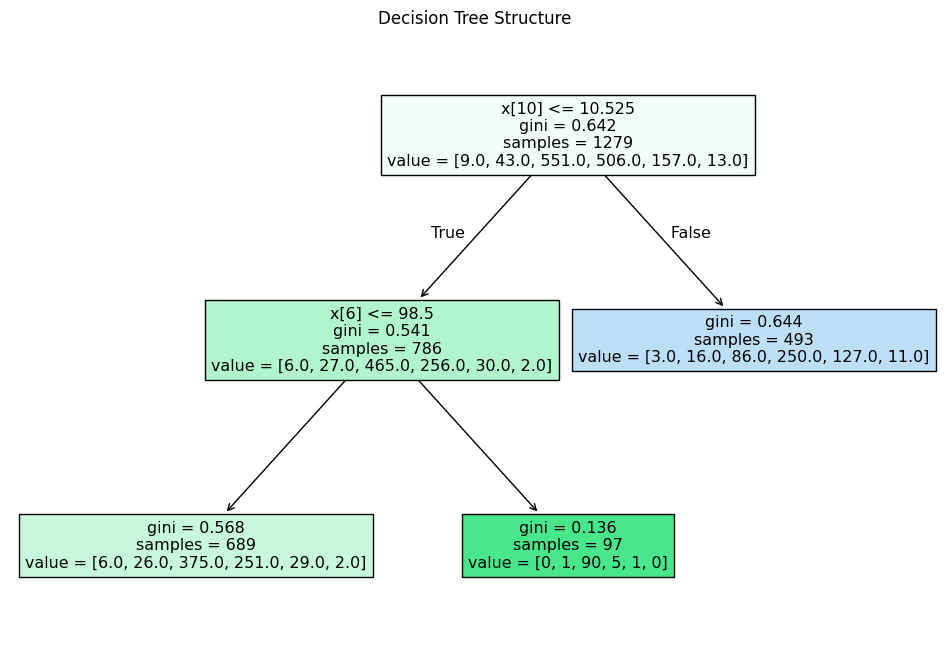

In [30]:
# Step 6: Plot the Decision Tree Structure
plt.figure(figsize=(12,8))
plot_tree(clf_hyper, filled=True)
plt.title('Decision Tree Structure')
plt.show()

In [11]:
# Build a Decision Tree with max_depth and min_samples_split hyperparameters
clf_hyper = DecisionTreeClassifier(max_depth=7, min_samples_split=10, random_state=42)
clf_hyper.fit(X_train, y_train)

# Make predictions and evaluate the accuracy
y_pred_hyper = clf_hyper.predict(X_test)
accuracy_hyper = accuracy_score(y_test, y_pred_hyper)
print(f"Test Accuracy with max_depth=5 and min_samples_split=10: {accuracy_hyper:.2f}")


# Make predictions and evaluate the accuracy
y_pred_hyper_train = clf_hyper.predict(X_train)
accuracy_hyper_train = accuracy_score(y_train, y_pred_hyper_train)
print(f"Train Accuracy with max_depth=5 and min_samples_split=10: {accuracy_hyper_train:.2f}")


Test Accuracy with max_depth=5 and min_samples_split=10: 0.55
Train Accuracy with max_depth=5 and min_samples_split=10: 0.74


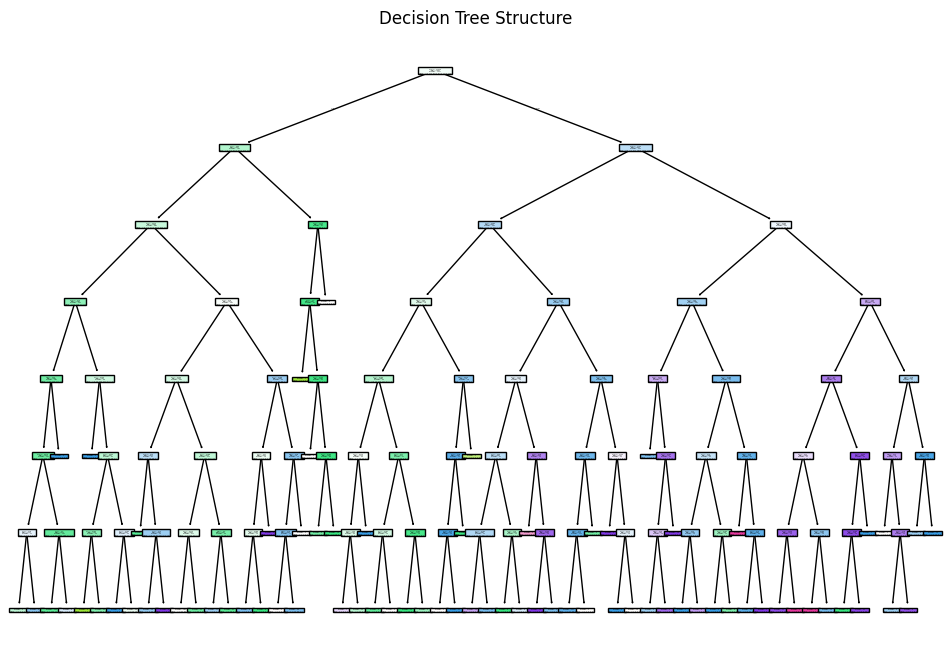

In [12]:
# Step 6: Plot the Decision Tree Structure
plt.figure(figsize=(12,8))
plot_tree(clf_hyper, filled=True)
plt.title('Decision Tree Structure')
plt.show()

 ## Step 5: Add min_samples_leaf and Pruning (ccp_alpha)
 - Adding the min_samples_leaf hyperparameter ensures that leaf nodes have a minimum number of samples, and we can apply pruning using the ccp_alpha parameter for further optimization.

In [13]:
# Build a pruned Decision Tree with min_samples_leaf and ccp_alpha
clf_pruned = DecisionTreeClassifier(min_samples_leaf=5,ccp_alpha=.001, random_state=42)
clf_pruned.fit(X_train, y_train)

# Make predictions and evaluate the accuracy
y_pred_pruned = clf_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"Test Accuracy with max_depth=5, min_samples_split=10, min_samples_leaf=5, and ccp_alpha=0.01: {accuracy_pruned:.2f}")

# Make predictions and evaluate the accuracy
y_pred_pruned_train = clf_pruned.predict(X_train)
accuracy_pruned_train = accuracy_score(y_train, y_pred_pruned_train)
print(f"Train Accuracy with max_depth=5, min_samples_split=10, min_samples_leaf=5, and ccp_alpha=0.01: {accuracy_pruned_train:.2f}")


Test Accuracy with max_depth=5, min_samples_split=10, min_samples_leaf=5, and ccp_alpha=0.01: 0.53
Train Accuracy with max_depth=5, min_samples_split=10, min_samples_leaf=5, and ccp_alpha=0.01: 0.81


##Step 6: Visualizing the Pruned Decision Tree
- We can visualize the pruned decision tree to better understand how it makes predictions.

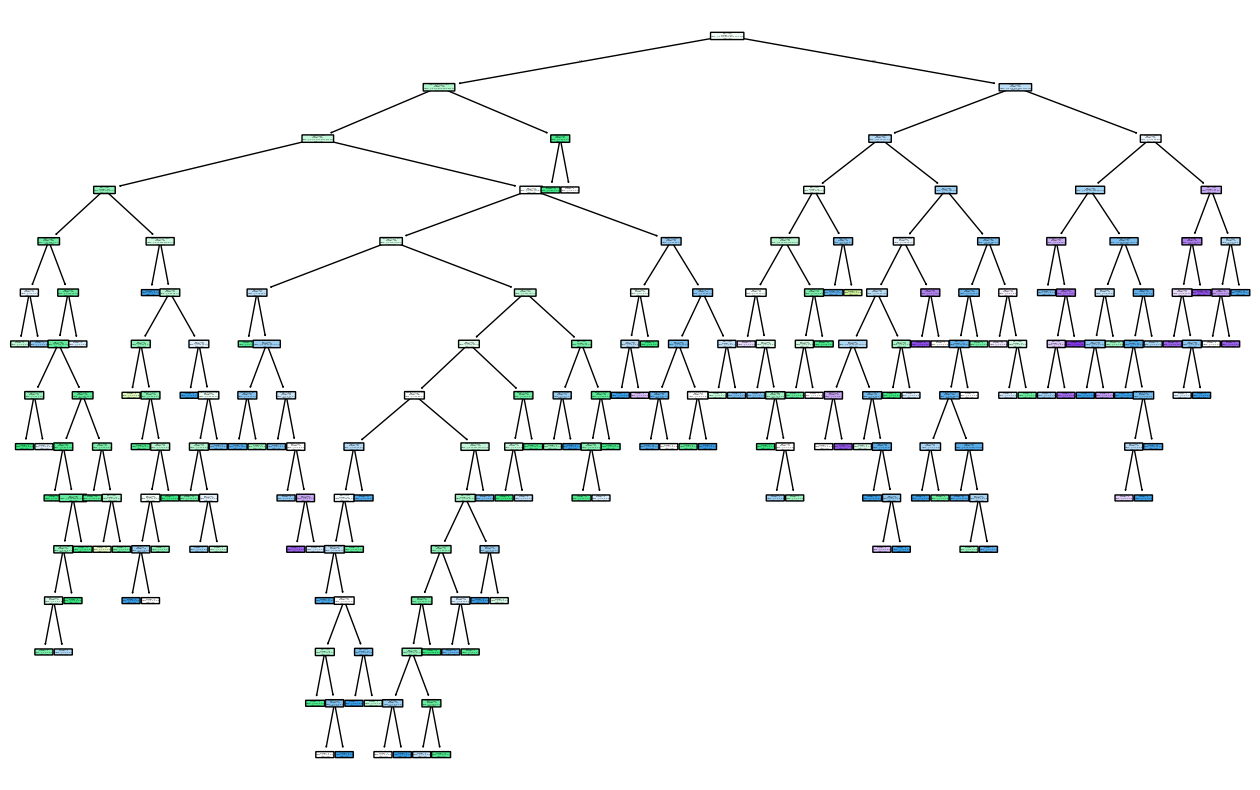

In [14]:
# Visualize the pruned decision tree
plt.figure(figsize=(16,10))
tree.plot_tree(clf_pruned, feature_names=X.columns, class_names=True, filled=True, rounded=True)
plt.show()


In [15]:
# Build a pruned Decision Tree with min_samples_leaf and ccp_alpha
clf_pruned = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=50, random_state=42)
clf_pruned.fit(X_train, y_train)

# Make predictions and evaluate the accuracy
y_pred_pruned = clf_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"Accuracy with max_depth=5, min_samples_split=10, min_samples_leaf=5, and ccp_alpha=0.01: {accuracy_pruned:.2f}")

Accuracy with max_depth=5, min_samples_split=10, min_samples_leaf=5, and ccp_alpha=0.01: 0.55


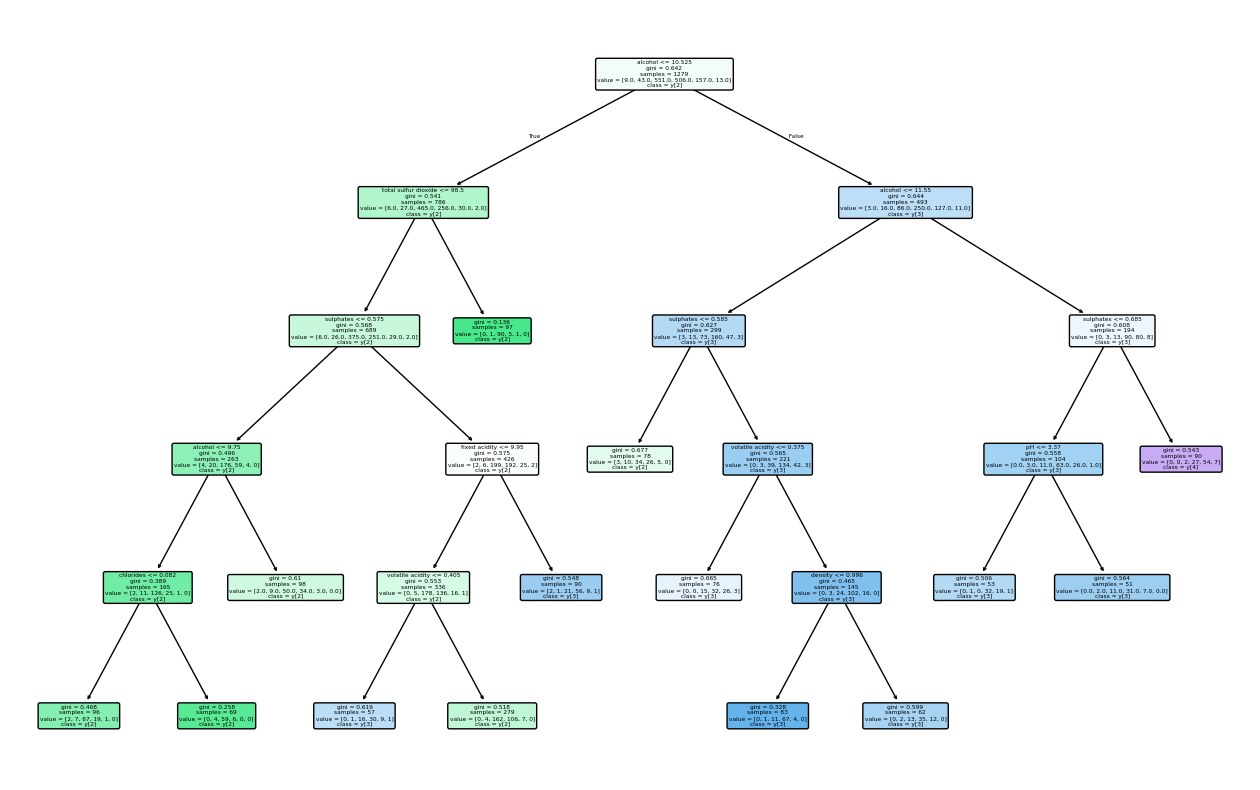

In [16]:
# Visualize the pruned decision tree
plt.figure(figsize=(16,10))
tree.plot_tree(clf_pruned, feature_names=X.columns, class_names=True, filled=True, rounded=True)
plt.show()